A definition of D_func will only work by editing sympy/printing/codeprinter.py  
In file codeprinter.py line 72 edit  
'strict': None to  
'strict': False  
This is a hack.  But I didn't have time to figure out how to do this through an API.  
Sympy is correcting this issue .  
As of sympy version 1.13.dev there is only one line in codeprinter.py with 'strict': None  
THis work is nearly 100% based on Aaron Meurer's blog  at https://www.asmeurer.com/blog/   "Verifying the Riemann Hypothesis with SymPy and mpmath"

In [1]:
from sympy import *
import mpmath
import numpy as np
import matplotlib.pyplot as plt
s = symbols('s')

In [2]:
import sympy
print(sympy.__version__)

1.13.dev


In [3]:
Z = pi**(-s/2)*gamma(s/2)*zeta(s)
Z

gamma(s/2)*zeta(s)/pi**(s/2)

In [4]:
Z.subs(s, 1/2 + 0.5j).evalf()

-1.97702795164031 + 5.49690501450151e-17*I

In [5]:
D = simplify(Z.diff(s)/Z,strict=True)
D

polygamma(0, s/2)/2 - log(pi)/2 + Derivative(zeta(s), s)/zeta(s)

In [6]:
Z_func = lambdify(s, Z, 'mpmath')

In [7]:
Derivate = Derivative(zeta(s), s)
Derivate

Derivative(zeta(s), s)

In [8]:
D_func = lambdify(s, D, modules=['mpmath',{'Derivative': lambda expr, z: mpmath.zeta(z, derivative=1)}])

In [9]:
def argument_count(func, N, maxdegree=6):
     return 1/(2*mpmath.pi*1j)*(mpmath.quad(func,
         [1 + 0.1j,1 + N*1j, 0 + N*1j, 0 + 0.1j,  1 + 0.1j],
         maxdegree=maxdegree))

In [10]:
expr = s**2 - s + 1/2
a=argument_count(lambdify(s, expr.diff(s)/expr), 10)
mpmath.mpc(a)

mpc(real='1.0', imag='3.4287545414000525e-24')

In [11]:
mpmath.mpmathify(a)

mpc(real='1.0', imag='3.4287545414000525e-24')

In [12]:
solve(s**2 - s + S(1)/2)

[1/2 - I/2, 1/2 + I/2]

In [13]:
def compute_points(Z_func, N, npoints=10000, dps=15):
        import warnings
        old_dps = mpmath.mp.dps
        points = np.linspace(0, N, npoints)
        try:
            mpmath.mp.dps = dps
            L = [mpmath.chop(Z_func(i)) for i in 1/2 + points*1j]
        finally:
            mpmath.mp.dps = old_dps
        if L[-1] == 0:
            # mpmath will give 0 if the precision is not high enough, since Z
            # decays rapidly on the critical line.
            warnings.warn("You may need to increase the precision")
        return L

In [14]:
def sign_changes(L):
        """
        Count the number of sign changes in L
   
        Values of L should all be real.
        """
        changes = 0
        assert im(L[0]) == 0, L[0]
        s = sign(L[0])
        for i in L[1:]:
            assert im(i) == 0, i
            s_ = sign(i)
            if s_ == 0:
                # Assume these got chopped to 0
                continue
            if s_ != s:
                changes += 1
            s = s_
        return changes

In [15]:
sign_changes(lambdify(s, sympy.sin(s))(np.linspace(-10, 10)))

7

In [17]:
argument_count(D_func, 20)

mpc(real='0.99999931531867581', imag='-3.2332902529067346e-24')

In [20]:
L = compute_points(Z_func, 20)

In [21]:
sign_changes(L)

1

In [23]:
argument_count(D_func, 25)

mpc(real='1.9961479945577916', imag='-3.2332902529067346e-24')

In [24]:
L = compute_points(Z_func, 25)
sign_changes(L)

2

In [25]:
argument_count(D_func, 30)

mpc(real='2.9997317058520916', imag='-3.2332902529067346e-24')

In [26]:
L = compute_points(Z_func, 30)
sign_changes(L)

3

In [21]:
def plot_points_bad(L, N):
        npoints = len(L)
        points = np.linspace(0, N, npoints)
        plt.figure()
        plt.plot(points, L)
        plt.plot(points, [0]*npoints, linestyle=':')

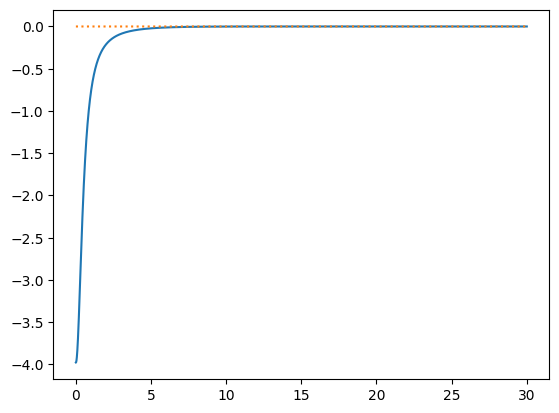

In [22]:
plot_points_bad(L, 30)

In [23]:
def plot_points(L, N):
        npoints = len(L)
        points = np.linspace(0, N, npoints)
        p = [mpmath.log(abs(i)) for i in L]
        plt.figure()
        plt.plot(points, p)
        plt.plot(points, [0]*npoints, linestyle=':')

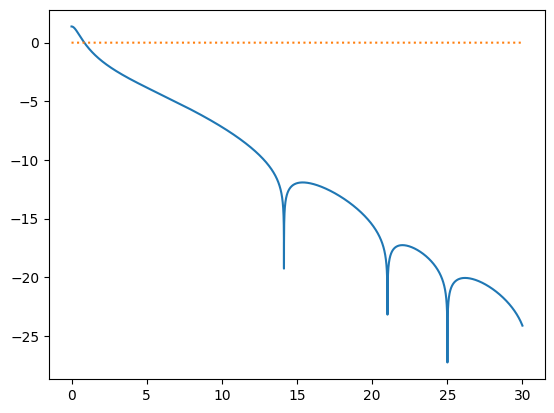

In [24]:
plot_points(L, 30)

In [27]:
argument_count(D_func, 100)

mpc(real='28.248036536895913', imag='-3.2332902529067346e-24')

In [29]:
argument_count(D_func, 100, maxdegree=9)

mpc(real='29.000000005970151', imag='-3.2332902529067346e-24')

In [30]:
L = compute_points(Z_func, 100)


C:\Users\nicho\AppData\Local\Temp\ipykernel_5696\458873408.py:13: UserWarning: You may need to increase the precision
  warnings.warn("You may need to increase the precision")


In [36]:
L = compute_points(Z_func, 100, dps=50)
L

[-3.976966226,
 -3.97536657,
 -3.970575272,
 -3.962615242,
 -3.951524364,
 -3.93735504,
 -3.920173585,
 -3.900059453,
 -3.877104342,
 -3.851411168,
 -3.823092955,
 -3.792271643,
 -3.759076844,
 -3.723644569,
 -3.686115947,
 -3.646635952,
 -3.605352165,
 -3.562413578,
 -3.517969461,
 -3.472168306,
 -3.425156843,
 -3.37707916,
 -3.328075904,
 -3.278283589,
 -3.227833994,
 -3.176853666,
 -3.125463501,
 -3.073778434,
 -3.021907194,
 -2.96995215,
 -2.918009221,
 -2.866167855,
 -2.814511059,
 -2.763115488,
 -2.712051572,
 -2.661383678,
 -2.611170312,
 -2.561464331,
 -2.512313192,
 -2.4637592,
 -2.415839776,
 -2.368587726,
 -2.322031515,
 -2.276195544,
 -2.231100413,
 -2.186763193,
 -2.143197683,
 -2.10041466,
 -2.058422121,
 -2.017225513,
 -1.976827954,
 -1.937230444,
 -1.898432061,
 -1.860430146,
 -1.823220482,
 -1.786797452,
 -1.751154196,
 -1.716282753,
 -1.682174188,
 -1.648818718,
 -1.616205823,
 -1.584324348,
 -1.553162599,
 -1.52270843,
 -1.492949319,
 -1.463872444,
 -1.435464746,
 -1

In [37]:
sign_changes(L)

29

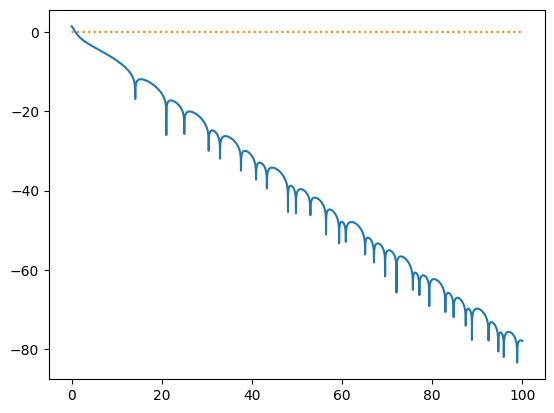

In [38]:
plot_points(L, 100)